# Utilizando o pacote Causal Impact
Causal Impact, pacote desenvolvido pelo Google em R que utiliza de um modelo bayesiano estrutural de serie temporal (bayesian structural time series model - BSTS).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from causalimpact import CausalImpact
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


Utilizando dados de vendas ao longo de 2011 a 2016 de 3 empresas automobilísticas: VolksWagen, BMW e Allianz. Iremos utilizar BMW  e Allianz como as variáveis de controle e iremos tentar prever a interferência na série temporal da VolksWagen.

Data:  (325, 3)
Columns:  ['VolksWagen', 'BMW', 'Allianz']


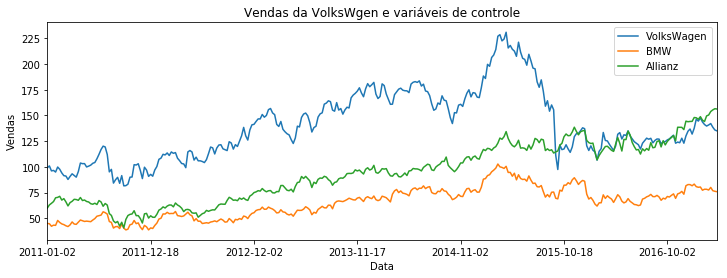

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dafiti/causalimpact/master/tests/fixtures/volks_data.csv', header=0, sep=' ', index_col='Date')
print('Data: ', data.shape)
print('Columns: ', list(data.columns))
data.plot(figsize=(12,4))
plt.title('Vendas da VolksWgen e variáveis de controle')
plt.xlabel('Data')
plt.ylabel("Vendas")
plt.show()

Utilizando apenas dos dados da VolksWagen para fazer a predição.

C:\Users\giova\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\giova\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\giova\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\Users\giova\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:1788: ValueWarning: Exogenous array provided to predict, but additional data not required. `exog` argument ignored.
  ' required. `exog` argument ignored.', ValueWarning)
C:\Users\giova\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representa

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    126.9              10026.1
Prediction (s.d.)         184.7 (3.7)        14588.2 (291.1)
95% CI                    [177.7, 192.1]     [14038.0, 15179.0]

Absolute effect (s.d.)    -57.7 (3.7)        -4562.1 (291.1)
95% CI                    [-65.2, -50.8]     [-5152.9, -4011.9]

Relative effect (s.d.)    -31.3% (2.0%)      -31.3% (2.0%)
95% CI                    [-35.3%, -27.5%]   [-35.3%, -27.5%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.00%

For more details run the command: print(impact.summary('report'))


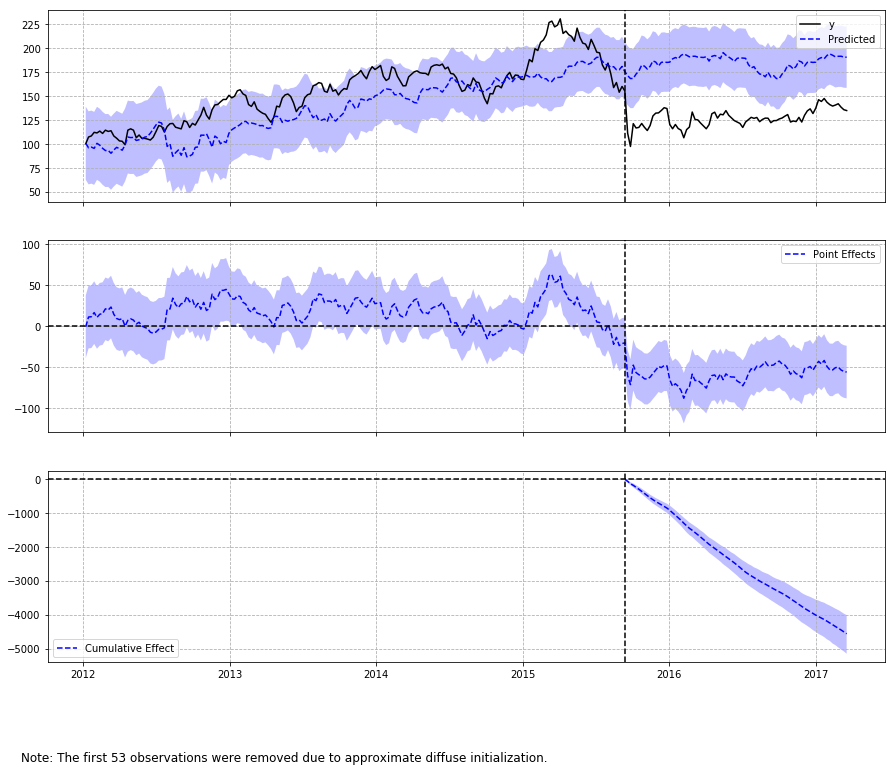

In [3]:
#período de pré e pós intervenção
pre_period = [data.index[0], "2015-09-13"]
post_period = ["2015-09-20", data.index[-1]]
causal1 = CausalImpact(data.iloc[:,0],pre_period,post_period, nseasons=[{'period': 52}])
print(causal1.summary())
causal1.plot()

Utilizando das variáveis de controle de outras 2 empresas:

C:\Users\giova\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\giova\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    126.9              10026.1
Prediction (s.d.)         175.2 (2.9)        13843.6 (225.9)
95% CI                    [169.6, 180.8]     [13399.8, 14285.2]

Absolute effect (s.d.)    -48.3 (2.9)        -3817.5 (225.9)
95% CI                    [-53.9, -42.7]     [-4259.1, -3373.8]

Relative effect (s.d.)    -27.6% (1.6%)      -27.6% (1.6%)
95% CI                    [-30.8%, -24.4%]   [-30.8%, -24.4%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.00%

For more details run the command: print(impact.summary('report'))


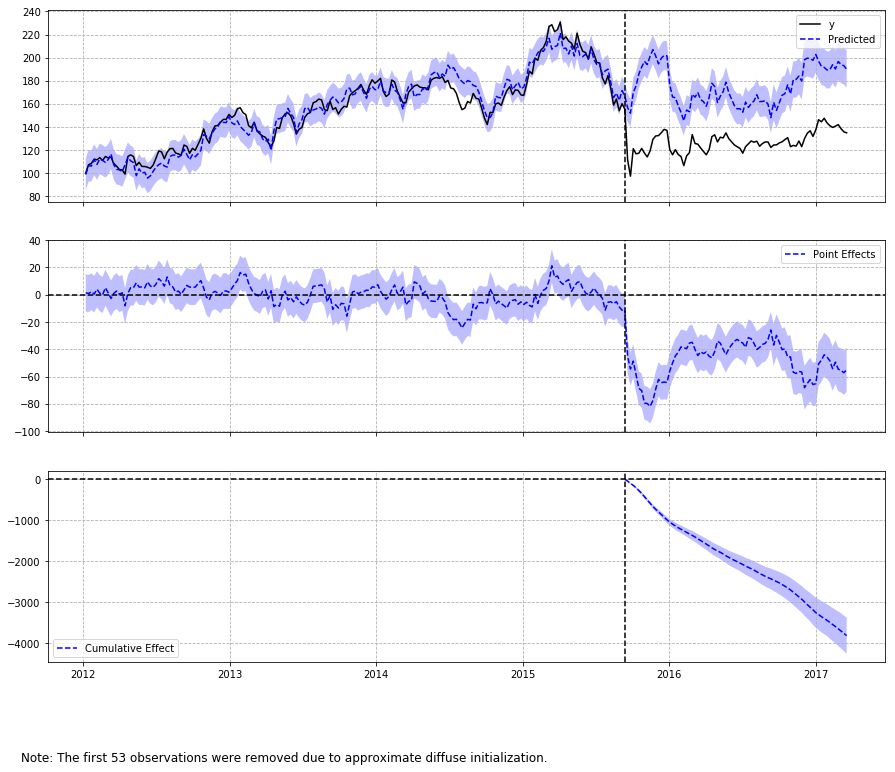

In [4]:
pre_period = [data.index[0], "2015-09-13"]
post_period = ["2015-09-20", data.index[-1]]
causal2 = CausalImpact(data = data, pre_period=pre_period, post_period=post_period, nseasons=[{'period': 52}])
print(causal2.summary())
causal2.plot()

Utilizando apenas 1 empresa a previsão teve uma média com valor 184.7 e desvio padrão 3.5, com variáveis de controle obtivemos uma média 175.2 com 2.9 de desvio padrão. 

# Utilizando agora a bilbioteca Prophet.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\giova\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


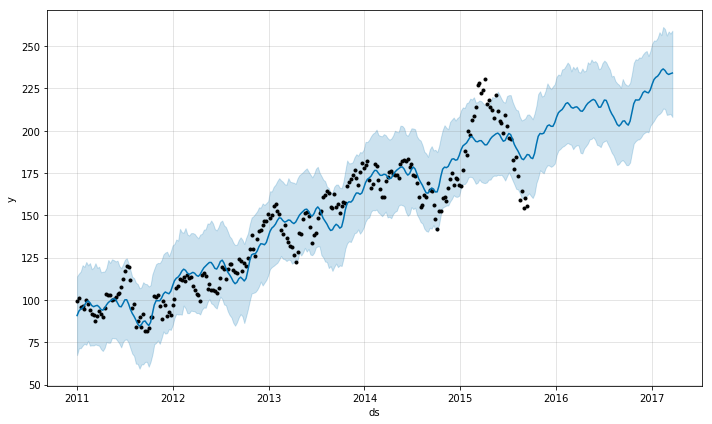

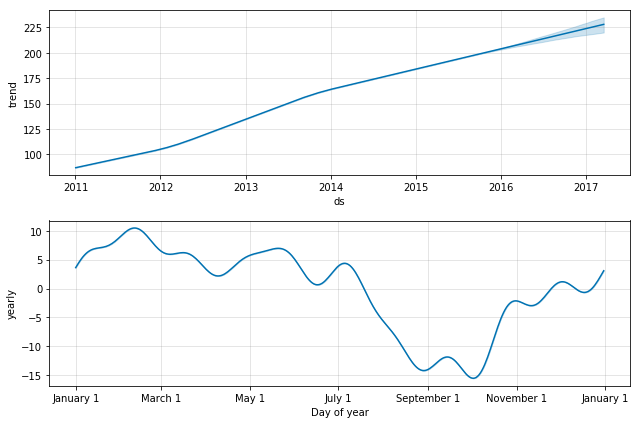

In [5]:
#dataframe com data e vendas
new_data = data.reset_index().iloc[:,:2]
new_data.rename(columns = {'Date':'ds', 'VolksWagen': 'y'}, inplace = True)
data_pre = new_data[new_data.ds <= "2015-09-13" ]
data_pos = new_data[new_data.ds > "2015-09-13"]

#fitando no periodo pre intervenção
prophet = Prophet(interval_width=0.95)
prophet.fit(data_pre)
data_predict = pd.DataFrame({'ds': new_data.ds})
#fazendo o predict para o período pós intervenção
forecast = prophet.predict(data_predict)

#plotando
fig1 = prophet.plot(forecast)
components = prophet.plot_components(forecast)

Vamos criar um plot para comparar a previsão do Causal Impact sem utilizar variável de controle e com a previsão do Prophet.

In [6]:
help(Prophet)

Help on class Prophet in module fbprophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniformly from
 |      the 

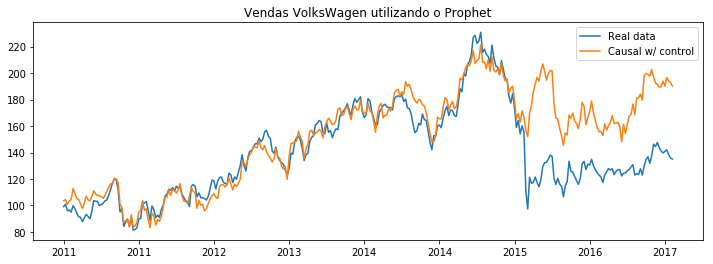

In [8]:
fig1 = plt.figure(figsize = (12,4))
plt.plot(new_data.ds, new_data.y, label = "Real data")
#plt.plot(new_data.ds, forecast.yhat, label = "Prophet")
#plt.plot(causal1.inferences.index, causal1.inferences.preds, label = "Causal")
plt.plot(causal2.inferences.index, causal2.inferences.preds, label = 'Causal w/ control')
plt.xticks(np.array(new_data.ds[new_data.index % 40 == 0]))
plt.title("Vendas VolksWagen utilizando o Prophet")
plt.legend()
plt.show()

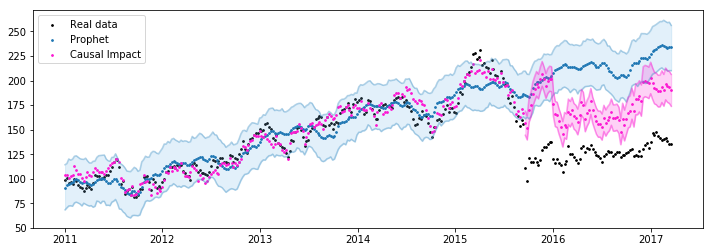

In [8]:
fig2 = plt.figure(figsize = (12,4))
plt.scatter(new_data.ds, new_data.y, label = 'Real data', c = 'black', s = 3)
plt.plot(new_data.ds, forecast.yhat_upper, c = '#4391c4', alpha = 0.4, label= "_nolegend_")
plt.plot(new_data.ds, forecast.yhat_lower, c = '#4391c4', alpha = 0.4, label= "_nolegend_")
plt.fill_between(new_data.ds, forecast.yhat_upper, forecast.yhat_lower, alpha = 0.2, color = '#70b7e6')
plt.scatter(new_data.ds, forecast.yhat, label = "Prophet", s = 3)
plt.plot(new_data.ds, causal2.inferences.post_preds_lower, c= '#fc19d3', alpha = 0.4, label= "_nolegend_")
plt.plot(new_data.ds, causal2.inferences.post_preds_upper, c = '#fc19d3', alpha = 0.4, label= "_nolegend_")
plt.fill_between(new_data.ds, causal2.inferences.post_preds_lower, causal2.inferences.post_preds_upper, alpha = 0.2, color = '#fc19d3')
plt.scatter(new_data.ds, causal2.inferences.preds, label = "Causal Impact", c = '#fc19d3',s = 3)
plt.legend()
plt.show()

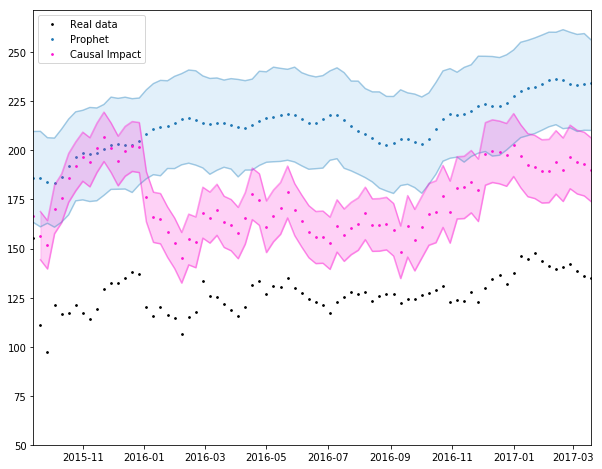

In [9]:
fig2 = plt.figure(figsize = (10,8))
plt.scatter(new_data.ds, new_data.y, label = 'Real data', c = 'black', s = 3)
plt.plot(new_data.ds, forecast.yhat_upper, c = '#4391c4', alpha = 0.4, label= "_nolegend_")
plt.plot(new_data.ds, forecast.yhat_lower, c = '#4391c4', alpha = 0.4, label= "_nolegend_")
plt.fill_between(new_data.ds, forecast.yhat_upper, forecast.yhat_lower, alpha = 0.2, color = '#70b7e6')
plt.scatter(new_data.ds, forecast.yhat, label = "Prophet", s = 3)
plt.plot(new_data.ds, causal2.inferences.post_preds_lower, c= '#fc19d3', alpha = 0.4, label= "_nolegend_")
plt.plot(new_data.ds, causal2.inferences.post_preds_upper, c = '#fc19d3', alpha = 0.4, label= "_nolegend_")
plt.fill_between(new_data.ds, causal2.inferences.post_preds_lower, causal2.inferences.post_preds_upper, alpha = 0.2, color = '#fc19d3')
plt.scatter(new_data.ds, causal2.inferences.preds, label = "Causal Impact", c = '#fc19d3',s = 3)
plt.xlim(left = np.datetime64('2015-09-13'), right = np.datetime64('2017-03-19'))
plt.legend()
plt.show()